<a href="https://colab.research.google.com/github/Konoko2004/TheProject/blob/main/yFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Install related libraries

!pip install yfinance
!pip install dash
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import date

In [ ]:
df1 = pd.DataFrame([[1,2,3,4]],
                   columns = ['a','b','c','d'])
df2 = pd.DataFrame([[1,2,3,4,5],[1,4,9,16,25],[1,16,87,12,41]],
                   columns = ['a','b','c','d','e'])

print(pd.concat([df1,df2],axis=1))

     a    b    c    d  a   b   c   d   e
0  1.0  2.0  3.0  4.0  1   2   3   4   5
1  NaN  NaN  NaN  NaN  1   4   9  16  25
2  NaN  NaN  NaN  NaN  1  16  87  12  41


In [ ]:
# Function to create a DF of a ticker. We will add them to a class of stocks later.

# def create_Stock(tickerName):
#     stock = yf.Ticker(tickerName)
#     stockhistory = stock.history(period = '1y')
#     stock_df = pd.DataFrame(stockhistory)
#     stock_df['Ticker'] = tickerName
#     stock_df.reset_index(inplace = True) # push date index to become a column.
#     stock_df['Date'] = stock_df['Date'].dt.strftime('%d/%m/%Y')  #dd/mm/yyyy format.
#     return stock_df

In [15]:
def create_Stock(*tickerName):

    frames = []

    for i in tickerName:
        stock = yf.Ticker(i)
        stockhistory = stock.history(period = 'max')
        stock_df = pd.DataFrame(stockhistory)
        stock_df['Ticker'] = i
        stock_df.reset_index(inplace = True)                                    #push date index to become a column
        stock_df['Date'] = stock_df['Date'].dt.strftime('%d/%m/%Y')             #dd/mm/yyyy format
        frames.append(stock_df)
    
    return frames
        
    

In [16]:
stockList = create_Stock('nio','tsla','msft','pltr','ocgn')
stockList = pd.concat(stockList)
stockList['High-Low'] = stockList['High'] - stockList['Low']
stockList = stockList[['Date','Ticker','Open','High','Low','Close','High-Low','Volume','Dividends','Stock Splits']]
stockList['Ticker'].unique()

array(['nio', 'tsla', 'msft', 'pltr', 'ocgn'], dtype=object)

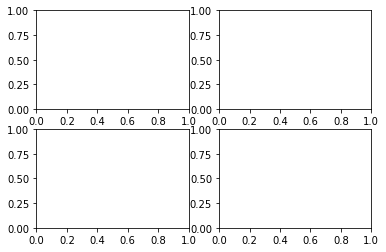

In [25]:
#Store each ticker in a list with seperate index
#so that we can plot each stock later on

TickerDF = []
stock_count = len(stockList['Ticker'].unique())
for i in stockList['Ticker'].unique():
    TickerDF.append(stockList[stockList['Ticker'] ==i])

fig =plt.figure()

axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

In [ ]:
nio = create_Stock(tickerName = 'nio')

nio['High-Low'] = nio['High']-nio['Low']
nio

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,High-Low
0,26/05/2020,3.420000,3.830000,3.400000,3.820000,59847900,0,0,nio,0.430000
1,27/05/2020,4.010000,4.200000,3.900000,4.170000,70718900,0,0,nio,0.300000
2,28/05/2020,3.980000,4.120000,3.750000,3.830000,62756900,0,0,nio,0.370000
3,29/05/2020,3.820000,4.000000,3.730000,3.980000,50303000,0,0,nio,0.270000
4,01/06/2020,4.000000,4.330000,3.960000,4.260000,69222000,0,0,nio,0.370000
...,...,...,...,...,...,...,...,...,...,...
249,20/05/2021,33.980000,34.509998,33.639999,34.330002,48991700,0,0,nio,0.869999
250,21/05/2021,34.660000,34.779999,33.869999,34.060001,49419300,0,0,nio,0.910000
251,24/05/2021,34.259998,36.490002,33.560001,35.889999,67244400,0,0,nio,2.930000
252,25/05/2021,36.320000,37.639999,35.689999,36.070000,76545800,0,0,nio,1.950001


In [ ]:
nio_tidied = pd.melt(nio,id_vars=['Volume','Dividends','Stock Splits','Date','Ticker'],
                     var_name='Position',value_name = 'Price')

nio_tidied

,Volume,Dividends,Stock Splits,Date,Ticker,Position,Price
0,59847900,0,0,26/05/2020,nio,Open,3.420000
1,70718900,0,0,27/05/2020,nio,Open,4.010000
2,62756900,0,0,28/05/2020,nio,Open,3.980000
3,50303000,0,0,29/05/2020,nio,Open,3.820000
4,69222000,0,0,01/06/2020,nio,Open,4.000000
...,...,...,...,...,...,...,...
1265,48991700,0,0,20/05/2021,nio,High-Low,0.869999
1266,49419300,0,0,21/05/2021,nio,High-Low,0.910000
1267,67244400,0,0,24/05/2021,nio,High-Low,2.930000
1268,76545800,0,0,25/05/2021,nio,High-Low,1.950001
